In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
import yfinance as yf

In [4]:
data=yf.download('SPY',start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-12-31,100.376900,146.8750,147.50000,146.250000,146.84375,3172700
2000-01-03,99.394493,145.4375,148.25000,143.875000,148.25000,8164300
2000-01-04,95.507530,139.7500,144.06250,139.640625,143.53125,8089800
2000-01-05,95.678391,140.0000,141.53125,137.250000,139.93750,12177900
2000-01-06,94.140717,137.7500,141.50000,137.750000,139.62500,6227200


/Users/pankajjadhav/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


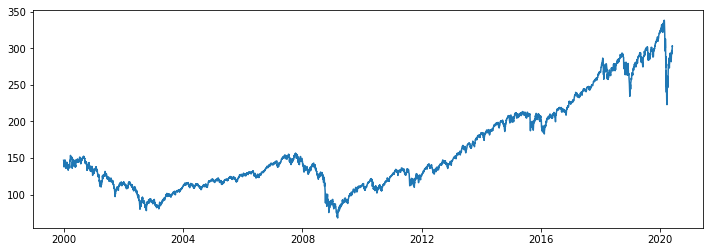

In [6]:
plt.figure(figsize=(12,4))
plt.plot(data['Close'])

In [7]:
returns=data['Close']/data['Close'].shift(1)-1

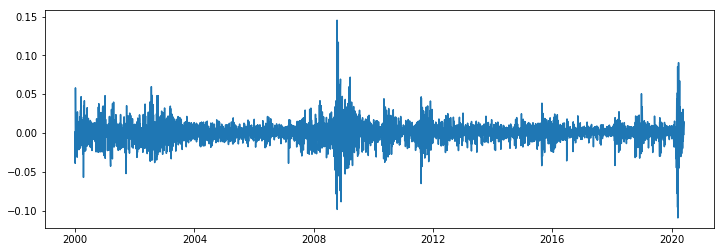

In [8]:
plt.figure(figsize=(12,4))
plt.plot(returns)

# Histogram

In [9]:
mean_returns=returns.mean()
mean_returns

0.00022020325810028112

In [10]:
std_returns=returns.std()
std_returns

0.012578104735753732

In [11]:
kurt=returns.kurtosis()
kurt

12.338836589356113

kurtosis is positive implies that tail is fat tailed  (more values occur at tails)<br>
kurtosis is negative implies that tail is thin tailed



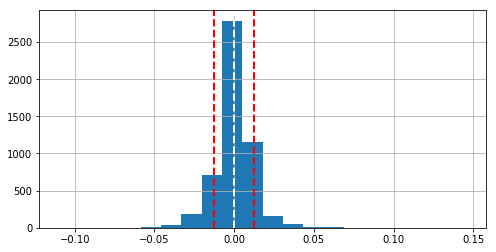

In [12]:
plt.figure(figsize=(8,4))
returns.hist(bins=20)
plt.axvline(mean_returns,color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_returns,color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_returns,color='r',linestyle='dashed',linewidth=2)

# Comparing histograms

In [13]:
data=yf.download("SPY XOM",start="2000-01-01")

[*********************100%***********************]  2 of 2 completed


In [14]:
data.head()

Adj Close                Close                 High            \
                   SPY        XOM       SPY       XOM        SPY       XOM   
Date                                                                         
1999-12-31  100.376900  22.445372  146.8750  40.28125  147.50000  40.50000   
2000-01-03   99.394493  21.818495  145.4375  39.15625  148.25000  40.37500   
2000-01-04   95.507530  21.400583  139.7500  38.40625  144.06250  39.09375   
2000-01-05   95.678391  22.567265  140.0000  40.50000  141.53125  40.87500   
2000-01-06   94.140717  23.733942  137.7500  42.59375  141.50000  42.90625   

                   Low                 Open              Volume            
                   SPY       XOM        SPY       XOM       SPY       XOM  
Date                                                                       
1999-12-31  146.250000  40.09375  146.84375  40.28125   3172700   2758600  
2000-01-03  143.875000  38.93750  148.25000  39.75000   8164300  13458200  
2000-01-04  139.640625  38.25000  143.53125  38.68750   8089800  14510800  
2000-01-05  137.250000  38.90625  139.93750  39.00000  12177900  17485000  
2000-01-06  137.750000  40.09375  139.62500  40.31250   6227200  19461600

In [15]:
spy_close=data['Close']['SPY']
xom_close=data['Close']['XOM']

In [16]:
return_spy=spy_close/spy_close.shift(1)-1
return_xom=xom_close/xom_close.shift(1)-1

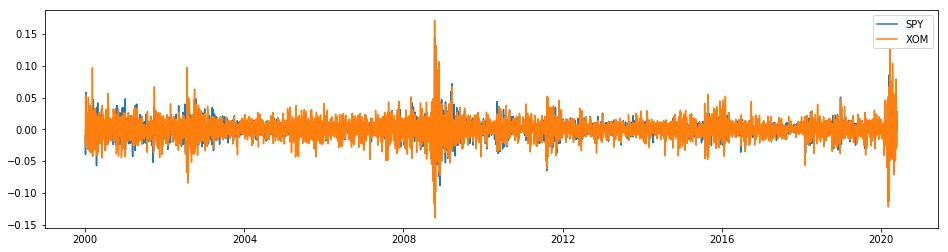

In [17]:
plt.figure(figsize=(16,4))
plt.plot(return_spy,label='SPY')
plt.plot(return_xom,label='XOM')
plt.legend()

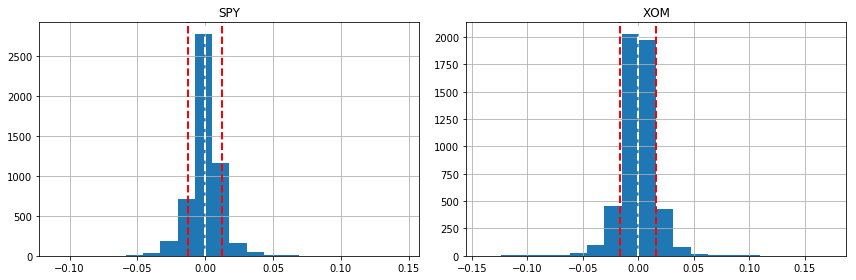

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(121)
return_spy.hist(bins=20)
plt.axvline(return_spy.mean(),color='w',linestyle='dashed',linewidth=2)
plt.axvline(return_spy.std(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(-return_spy.std(),color='r',linestyle='dashed',linewidth=2)
plt.title('SPY')
plt.subplot(122)
return_xom.hist(bins=20)
plt.axvline(return_xom.mean(),color='w',linestyle='dashed',linewidth=2)
plt.axvline(return_xom.std(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(-return_xom.std(),color='r',linestyle='dashed',linewidth=2)
plt.title('XOM')
plt.tight_layout()

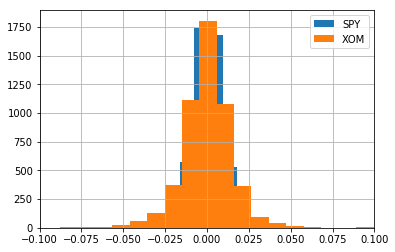

In [19]:
#compute both histogram on same plot
return_spy.hist(bins=30,label='SPY')
return_xom.hist(bins=30,label='XOM')
plt.xlim(-0.10,0.10)
plt.legend()

# Scatterplot

In [20]:
data=yf.download("SPY XOM GLD",start="2000-01-01",group_by='ticker')

[*********************100%***********************]  3 of 3 completed


In [21]:
data.head()

SPY                                                        \
             Adj Close     Close       High         Low       Open    Volume   
Date                                                                           
1999-12-31  100.376900  146.8750  147.50000  146.250000  146.84375   3172700   
2000-01-03   99.394493  145.4375  148.25000  143.875000  148.25000   8164300   
2000-01-04   95.507530  139.7500  144.06250  139.640625  143.53125   8089800   
2000-01-05   95.678391  140.0000  141.53125  137.250000  139.93750  12177900   
2000-01-06   94.140717  137.7500  141.50000  137.750000  139.62500   6227200   

                  XOM                                                    \
            Adj Close     Close      High       Low      Open    Volume   
Date                                                                      
1999-12-31  21.746706  40.28125  40.50000  40.09375  40.28125   2758600   
2000-01-03  21.139345  39.15625  40.37500  38.93750  39.75000  13458200   
2000-01-04  20.734442  38.40625  39.09375  38.25000  38.68750  14510800   
2000-01-05  21.864794  40.50000  40.87500  38.90625  39.00000  17485000   
2000-01-06  22.995153  42.59375  42.90625  40.09375  40.31250  19461600   

                 GLD                             
           Adj Close Close High Low Open Volume  
Date                                             
1999-12-31       NaN   NaN  NaN NaN  NaN    NaN  
2000-01-03       NaN   NaN  NaN NaN  NaN    NaN  
2000-01-04       NaN   NaN  NaN NaN  NaN    NaN  
2000-01-05       NaN   NaN  NaN NaN  NaN    NaN  
2000-01-06       NaN   NaN  NaN NaN  NaN    NaN

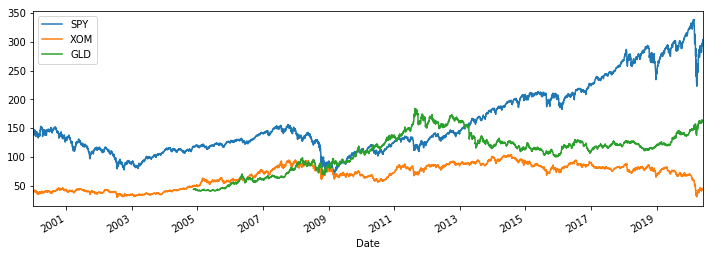

In [22]:
plt.figure(figsize=(12,4))
data['SPY']['Close'].plot(label='SPY')
data['XOM']['Close'].plot(label='XOM')
data['GLD']['Close'].plot(label='GLD')
plt.legend()
plt.show()

In [23]:
type(data)

pandas.core.frame.DataFrame

# fill GLD with fill backward method

In [24]:
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)

In [25]:
#%matplotlib notebook

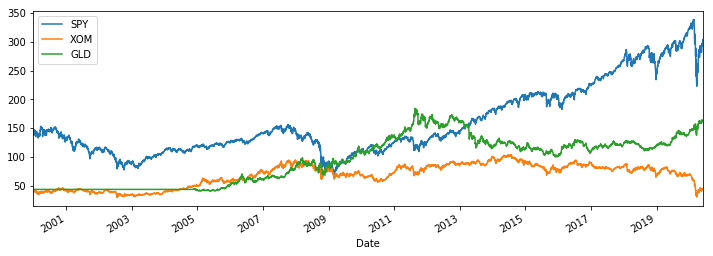

In [40]:
plt.figure(figsize=(12,4))
data['SPY']['Close'].plot(label='SPY')
data['XOM']['Close'].plot(label='XOM')
data['GLD']['Close'].plot(label='GLD')
plt.legend()
plt.show()

In [41]:
data.head()

SPY                                                        \
             Adj Close     Close       High         Low       Open    Volume   
Date                                                                           
1999-12-31  100.376900  146.8750  147.50000  146.250000  146.84375   3172700   
2000-01-03   99.394493  145.4375  148.25000  143.875000  148.25000   8164300   
2000-01-04   95.507530  139.7500  144.06250  139.640625  143.53125   8089800   
2000-01-05   95.678391  140.0000  141.53125  137.250000  139.93750  12177900   
2000-01-06   94.140717  137.7500  141.50000  137.750000  139.62500   6227200   

                  XOM                                                    \
            Adj Close     Close      High       Low      Open    Volume   
Date                                                                      
1999-12-31  21.746706  40.28125  40.50000  40.09375  40.28125   2758600   
2000-01-03  21.139345  39.15625  40.37500  38.93750  39.75000  13458200   
2000-01-04  20.734442  38.40625  39.09375  38.25000  38.68750  14510800   
2000-01-05  21.864794  40.50000  40.87500  38.90625  39.00000  17485000   
2000-01-06  22.995153  42.59375  42.90625  40.09375  40.31250  19461600   

                  GLD                                                 
            Adj Close      Close       High    Low   Open     Volume  
Date                                                                  
1999-12-31  44.380001  44.380001  44.490002  44.07  44.43  5992000.0  
2000-01-03  44.380001  44.380001  44.490002  44.07  44.43  5992000.0  
2000-01-04  44.380001  44.380001  44.490002  44.07  44.43  5992000.0  
2000-01-05  44.380001  44.380001  44.490002  44.07  44.43  5992000.0  
2000-01-06  44.380001  44.380001  44.490002  44.07  44.43  5992000.0

In [42]:
#df=pd.DataFrame.from_dict({'SPY':data['SPY']['Close'],'XOM':data['XOM']['Close'],'GLD':data['GLD']['Close']})

In [44]:
def daily_return(df):
    df=df/df.shift(1)-1
    df.iloc[0,]=0
    
    return df


In [45]:
spy_ret=daily_return(data['SPY']['Close'])
xom_ret=daily_return(data['XOM']['Close'])
gld_ret=daily_return(data['GLD']['Close'])


In [46]:
daily_return(data['GLD']['Close']).shape

(5134,)

In [47]:
#spy_ret

* slope of scatterplot : beta 
* coefficient value : alpha

In [49]:
beta_xom,alpha_xom=np.polyfit(spy_ret,xom_ret,deg=1)

In [51]:
print(beta_xom)
print(alpha_xom)

0.8629216217395762
-4.026499603929381e-05


In [52]:
beta_gld,alpha_gld=np.polyfit(spy_ret,gld_ret,deg=1)

In [53]:
print(beta_gld)
print(alpha_gld)

0.02277424567144657
0.00029728183082767146


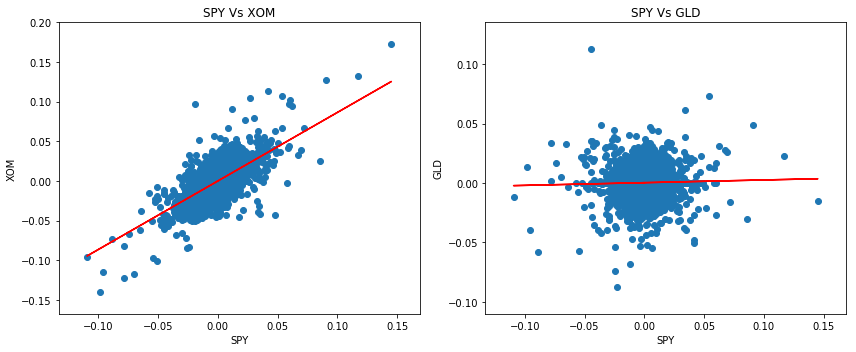

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(spy_ret,xom_ret)
plt.plot(spy_ret,beta_xom*spy_ret+alpha_xom,'r-')
plt.title('SPY Vs XOM')
plt.xlabel('SPY')
plt.ylabel('XOM')
plt.subplot(122)
plt.scatter(spy_ret,gld_ret)
plt.plot(spy_ret,beta_gld*spy_ret+alpha_gld,'r-')
plt.title('SPY Vs GLD')
plt.xlabel('SPY')
plt.ylabel('GLD')
plt.tight_layout()

# correlation coefficient

In [57]:
df=pd.DataFrame.from_dict({'SPY':spy_ret,'XOM':xom_ret,'GLD':spy_ret})

In [ ]:
df.corr(method='pearson')